# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [36]:
import numpy as np
import pandas as pd
# import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('week4.csv')
df

,Date,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,VWAP,Month,Year,Day_Perc_Change,Trend,signal,Bolinger,Upper Band,Lower Band
0,2017-05-15,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,509.450000,5,2017,0.000000,Slight or No change,0.0,509.450000,NaN,NaN
1,2017-05-16,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,510.249582,5,2017,0.003631,Slight or No change,0.0,510.375000,512.991295,507.758705
2,2017-05-17,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,508.495948,5,2017,-0.009681,Slight or No change,0.0,509.033333,514.035666,504.031001
3,2017-05-18,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,500.779579,5,2017,-0.026563,Slight or No change,0.0,505.000000,521.642316,488.357684
4,2017-05-19,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,500.222798,5,2017,0.009333,Slight or No change,0.0,503.500000,519.397327,487.602673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,MINDTREE,EQ,2019-05-07,981.75,982.80,985.00,975.00,981.00,979.95,979.77,1242934,1.217784e+09,10864,884988,71.20,856.636578,5,2019,-0.001833,Slight or No change,1.0,972.495000,994.634912,950.355088
490,2019-05-08,MINDTREE,EQ,2019-05-08,979.95,981.00,985.00,971.05,982.00,980.50,979.84,4301316,4.214603e+09,13038,3851210,89.54,857.418361,5,2019,0.000561,Slight or No change,1.0,974.345000,992.015996,956.674004
491,2019-05-09,MINDTREE,EQ,2019-05-09,980.50,979.60,983.15,976.10,980.90,980.45,980.02,3787159,3.711482e+09,8159,3479880,91.89,858.098293,5,2019,-0.000051,Slight or No change,1.0,975.720000,990.409538,961.030462
492,2019-05-10,MINDTREE,EQ,2019-05-10,980.45,980.40,982.90,973.00,974.00,975.35,977.55,215170,2.103396e+08,5128,26734,12.42,858.135098,5,2019,-0.005202,Slight or No change,1.0,976.622500,988.494780,964.750220


In [37]:
import numpy as np
df['Daily Return'] = df['Close Price'].pct_change() 
df['Daily Return'] = df['Daily Return'].replace([np.inf, -np.inf], np.nan)
df = df.dropna()
mean_daily_return = df['Daily Return'].mean()
volatility_daily_return = df['Daily Return'].std()
print(f"Mean Daily Return : {mean_daily_return} \nDaily Volatility : {volatility_daily_return}")

Mean Daily Return : 0.0015578165636875021 
Daily Volatility : 0.02151154178820467


In [38]:
annual_mean = mean_daily_return * 252
annual_std = volatility_daily_return * np.sqrt(252)
print(f"Mean Annual Return : {annual_mean} \nAnnual Volatility : {annual_std}")

Mean Annual Return : 0.39256977404925053 
Annual Volatility : 0.3414851393349794


### Query 5.2
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [18]:
df_1 = pd.read_csv('APOLLOTYRE.csv')
df_2 = pd.read_csv('FORTIS.csv')
df_3 = pd.read_csv('GAIL.csv')
df_4 = pd.read_csv('PVR.csv')
df_5 = pd.read_csv('VOLTAS.csv')

In [26]:
df_apollo = df_1[df_1.Series == 'EQ']
df_fortis = df_2[df_2.Series == 'EQ']
df_gail = df_3[df_3.Series == 'EQ']
df_pvr = df_4[df_4.Series == 'EQ']
df_voltas = df_5[df_5.Series == 'EQ']

df_gail.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,GAIL,EQ,15-May-2017,409.20,413.05,415.25,410.00,413.80,414.00,412.83,1077551,4.448488e+08,22153,459059,42.60
1,GAIL,EQ,16-May-2017,414.00,415.80,416.00,410.25,411.00,411.40,412.85,2434834,1.005216e+09,46472,1771251,72.75
2,GAIL,EQ,17-May-2017,411.40,411.50,412.90,405.60,408.50,408.30,408.42,2002105,8.177070e+08,48972,1405319,70.19
3,GAIL,EQ,18-May-2017,408.30,406.35,409.00,401.50,403.00,404.75,407.03,2132140,8.678451e+08,39137,1405640,65.93
4,GAIL,EQ,19-May-2017,404.75,404.00,406.35,396.00,401.35,401.05,400.31,2847835,1.140022e+09,64928,1922275,67.50


In [33]:
data = pd.DataFrame({
    'apollo' : df_apollo['Close Price'],
    'fortis' : df_fortis['Close Price'],
    'gail' : df_gail['Close Price'],
    'pvr' : df_pvr['Close Price'],
    'voltas' : df_voltas['Close Price']
})
data = data.dropna()
data

,apollo,fortis,gail,pvr,voltas
0,231.90,205.25,414.00,1524.95,431.85
1,234.40,207.90,411.40,1539.00,432.45
2,237.35,205.90,408.30,1530.30,430.20
3,232.65,196.85,404.75,1515.05,414.10
4,234.65,203.55,401.05,1513.55,415.75
...,...,...,...,...,...
489,195.20,136.35,340.75,1802.30,601.45
490,191.75,135.20,337.50,1780.10,576.65
491,185.30,133.60,340.40,1748.50,574.10
492,190.95,133.00,341.55,1758.45,580.05


### Query 5.3
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [39]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
mean_daily_returns = mean_daily_returns.values.reshape(5,1)
cov_matrix = returns.cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2]) # equal weights to all stocks
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio expected annualised return is {} and volatility is {}'.format(portfolio_return,portfolio_std_dev))

Portfolio expected annualised return is 0.05 and volatility is 0.18


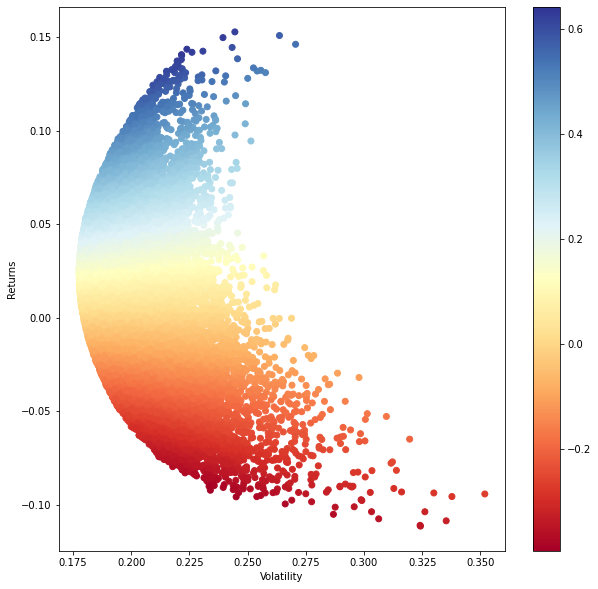

In [54]:
# Now we will use Monte Carlo Simulation

returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 50000

#set up array to hold results
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]    
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns = ['ret','stdev','sharpe'])

results_frame
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize = (10, 10))
plt.scatter(results_frame.stdev, results_frame.ret, c = results_frame.sharpe, cmap = 'RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

### Query 5.4
Mark the 2 portfolios where -
*   Portfolio 1 - The Sharpe ratio is the highest
*   Portfolio 2 - The volatility is the lowest. 




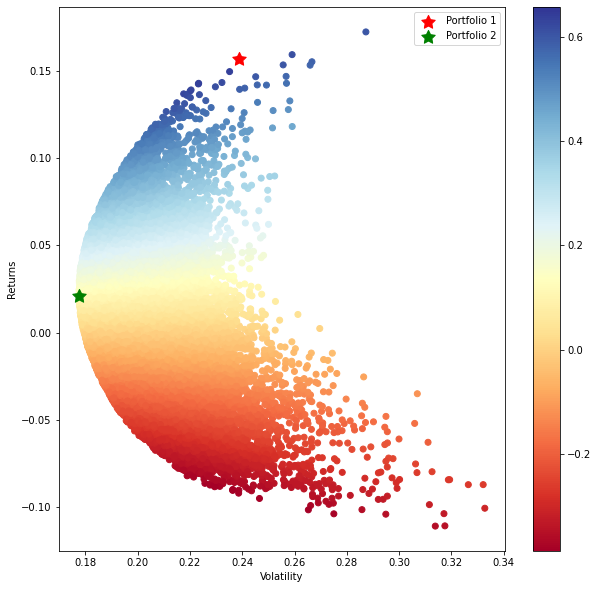

In [55]:
stocks = ['apollo','fortis','gail','pvr','voltas']

returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 50000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]  
     #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns = ['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize = (10, 10))
plt.scatter(results_frame.stdev, results_frame.ret, c = results_frame.sharpe, cmap = 'RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker = (5,1,0), color = 'r', s = 200, label = 'Portfolio 1')
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1], min_vol_port[0], marker = (5,1,0), color = 'g', s = 200, label = 'Portfolio 2')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.legend()
plt.show()